In [1]:
import pandas as pd
from helpers import idf_helpers
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from eppy.modeleditor import IDF
from IPython.display import display

import os

para ver como manipular fechas en time series:

https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea

In [2]:
%%bash
ls studies/
ls input/

__init__.py
__pycache__
ReadVarsESO
TemperatureStudy1
TemperatureStudy1.py
Temperaturestudy2
Temperaturestudy2.py
TemperatureStudy3
TemperatureStudy3.py
air_conditioner
demo_simple.idf
simple_room_1_window_1_door.idf
simple_room_1_window_1_door_output_vars.idf
simple_room_1_window_1_door_unitary_System_sch_constant.idf
simple_room_1_window_1_door_unitary_System_sch_small_office_Activity.idf
simple_room_1_window_1_door_ventilator_constant
simple_room_1_window_1_door_ventilator_constant.idf
simple_room_1_window_1_door_ventilator_constant.osm
Wheather file


## Primer estudio 
Input: eppyProject/input/simple_room_1_window_1_door.idf

with obj ['PEOPLE', 'LIGHTS', 'ELECTRICEQUIPMENT'] deleted (no lights, people or electricequipment)

Variables: ['Site Outdoor Air Drybulb Temperature','Zone Air Temperature']

python Script: TemperaturaStudy.py

In [15]:
data1 = eso_to_ts('studies/TemperatureStudy1/eplusout.csv')

idffile = 'studies/TemperatureStudy1/idffile.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf1 = initialization(idffile, iddfile, epwfile)

In [16]:
@interact
def show_not_null_classes(classes = notnullobj(idf1)):
    return epobject_to_df(idf1.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

## segundo estudio

Input: 'eppyProject/input/simple_room_1_window_1_door_ventilator_constant.idf'.idf

Using HVACTemplate:System:Unitary

Heating_Setpoint_Schedule_Name 	Always On Continuous

with obj ['PEOPLE', 'LIGHTS', 'ELECTRICEQUIPMENT'] deleted (no lights, people or electricequipment)

Variables: ['Site Outdoor Air Drybulb Temperature','Zone Air Temperature']

python Script: TemperaturaStudy2.py


In [27]:
%%bash
ls studies/TemperatureStudy2/

eplusout.audit
eplusout.bnd
eplusout.csv
eplusout.eio
eplusout.end
eplusout.err
eplusout.eso
eplusout.expidf
eplusout.mdd
eplusout.mtd
eplusout.rdd
eplusout.shd
eplusout.sql
eplusssz.csv
eplustbl.htm
epluszsz.csv
idffile.idf
readvars.audit
ReadVarsESO
sqlite.err


In [28]:
data2 = eso_to_ts('/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/studies/TemperatureStudy2/eplusout.csv')
idffile = 'studies/TemperatureStudy2/idffile.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf2 = initialization(idffile, iddfile, epwfile)

In [29]:
data2.head()

,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),THERMAL ZONE 1:Zone Air Temperature [C](Hourly)
Date/Time,,
2000-01-01 01:00:00,4.358333,13.196292
2000-01-01 02:00:00,3.716667,12.797883
2000-01-01 03:00:00,4.883333,12.866066
2000-01-01 04:00:00,5.650000,12.940725
2000-01-01 05:00:00,6.016667,12.973265


In [30]:
@interact
def show_not_null_classes(classes = notnullobj(idf2)):
    return epobject_to_df(idf2.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

<AxesSubplot:xlabel='Date/Time'>

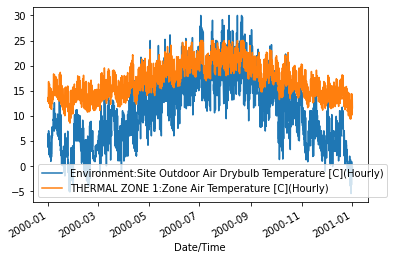

In [8]:
data2.plot()

## Tercer estudio 
### igual que el primero pero con gente

Input: 'eppyProject/input/simple_room_1_window_1_door.idf'.idf

Using HVACTemplate:System:Unitary

Heating_Setpoint_Schedule_Name Always On Continuous

with obj ['', 'LIGHTS', 'ELECTRICEQUIPMENT'] deleted (no lights, people or electricequipment)

Variables: ['Site Outdoor Air Drybulb Temperature','Zone Air Temperature']

python Script: TemperaturaStudy2.py


In [9]:
data3 = eso_to_ts('studies/TemperatureStudy3/eplusout.csv')

idffile = 'studies/TemperatureStudy3/idffile.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf3 = initialization(idffile, iddfile, epwfile)

In [10]:
@interact
def show_not_null_classes(classes = notnullobj(idf3)):
    return epobject_to_df(idf3.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

<AxesSubplot:xlabel='Date/Time'>

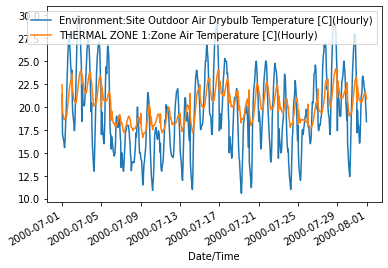

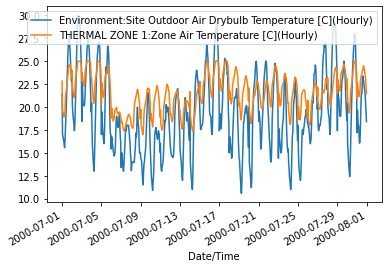

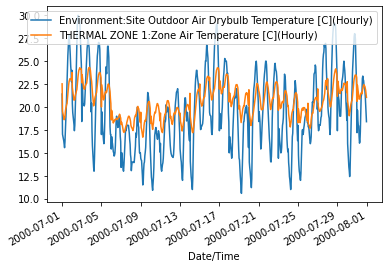

In [11]:
# Verano mes de Julio
data1[data1.index.month == 7].plot()
data2[data2.index.month == 7].plot()
data3[data3.index.month == 7].plot()

In [12]:
data_env = data1['Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)']

In [13]:
data1_w = data1[data1.index.month == 1].iloc[:,1]
data2_w = data2[data2.index.month == 1].iloc[:,1]
data3_w = data3[data3.index.month == 1].iloc[:,1]

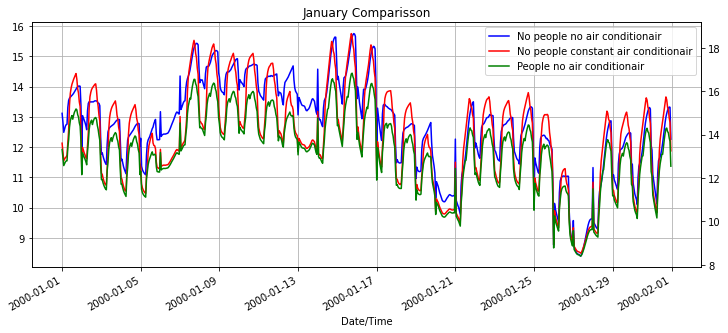

In [14]:
plt.figure(figsize=(12,5))
plt.xlabel('Number of requests every 10 minutes')

ax1 = data1_w.plot(color='blue', grid=True, label='No people no air conditionair')
ax2 = data2_w.plot(color='red', grid=True, secondary_y=True, label='No people constant air conditionair')
ax3 = data3_w.plot(color='green', grid=True, secondary_y=True, label='People no air conditionair')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
plt.title('January Comparisson')
plt.legend(h1+h2, l1+l2, loc=0)


In [23]:
data1_s = data1[data1.index.month == 8].iloc[:,1]
data2_s = data2[data2.index.month == 8].iloc[:,1]
data3_s = data3[data3.index.month == 8].iloc[:,1]

In [27]:
data1_s

Date/Time
2000-08-01 01:00:00    20.120978
2000-08-01 02:00:00    19.700908
2000-08-01 03:00:00    19.292801
2000-08-01 04:00:00    18.904878
2000-08-01 05:00:00    18.571683
                         ...    
2000-08-31 20:00:00    19.334902
2000-08-31 21:00:00    19.144571
2000-08-31 22:00:00    18.945654
2000-08-31 23:00:00    18.752136
2000-08-31 00:00:00    18.607404
Name: THERMAL ZONE 1:Zone Air Temperature [C](Hourly) , Length: 744, dtype: float64

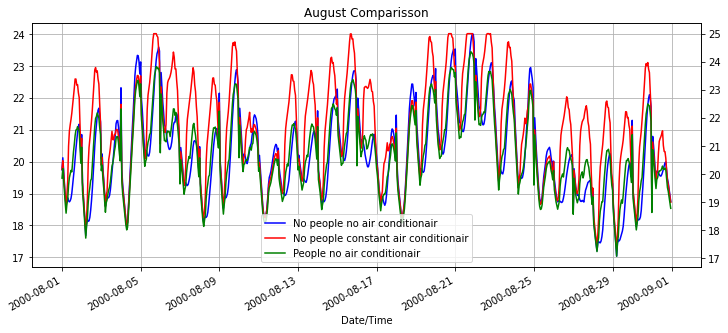

In [25]:
plt.figure(figsize=(12,5))
plt.xlabel('Number of requests every 10 minutes')

ax1 = data1_s.plot(color='blue', grid=True, label='No people no air conditionair')
ax2 = data2_s.plot(color='red', grid=True, secondary_y=True, label='No people constant air conditionair')
ax3 = data3_s.plot(color='green', grid=True, secondary_y=True, label='People no air conditionair')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
plt.title('August Comparisson')
plt.legend(h1+h2, l1+l2, loc=0)

## One day - winter

In [79]:
data1_wd = data1[(data1.index.month == 1) & ((data1.index.day == 8)|(data1.index.day == 9)|(data1.index.day == 10))].iloc[:,1]
data2_wd = data2[(data2.index.month == 1) & ((data2.index.day == 8)|(data2.index.day == 9)|(data2.index.day == 10))].iloc[:,1]
data3_wd = data3[(data3.index.month == 1) & ((data3.index.day == 8)|(data3.index.day == 9)|(data3.index.day == 10))].iloc[:,1]
data_env_wd = data_env[(data_env.index.month == 1) & ((data_env.index.day == 8)|(data_env.index.day == 9)|(data_env.index.day == 10))]

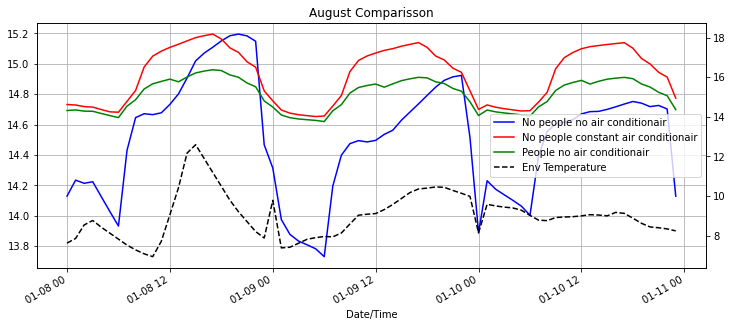

In [80]:
plt.figure(figsize=(12,5))
plt.xlabel('Number of requests every 10 minutes')

ax1 = data1_wd.plot(color='blue', grid=True, label='No people no air conditionair')
ax2 = data2_wd.plot(color='red', grid=True, secondary_y=True, label='No people constant air conditionair')
ax3 = data3_wd.plot(color='green', grid=True, secondary_y=True, label='People no air conditionair')
ax4 = data_env_wd.plot(linestyle = '--',color='black', grid=True, secondary_y=True, label='Env Temperature')
# TODO trazar una linea con la supuesta temperatura de confort

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
h4, l4 = ax4.get_legend_handles_labels()

plt.title('January Comparisson')
plt.legend(h1+h2, l1+l2, loc=0)

Es verano lo que jode don las altas temperaturas...

## One day - Summer

In [76]:
data1_sd = data1[(data1.index.month == 8) & ((data1.index.day == 8)|(data1.index.day == 9)|(data1.index.day == 10))].iloc[:,1]
data2_sd = data2[(data2.index.month == 8) & ((data2.index.day == 8)|(data2.index.day == 9)|(data2.index.day == 10))].iloc[:,1]
data3_sd = data3[(data3.index.month == 8) & ((data3.index.day == 8)|(data3.index.day == 9)|(data3.index.day == 10))].iloc[:,1]
data_env_sd = data_env[(data_env.index.month == 8) & ((data_env.index.day == 8)|(data_env.index.day == 9)|(data_env.index.day == 10))]


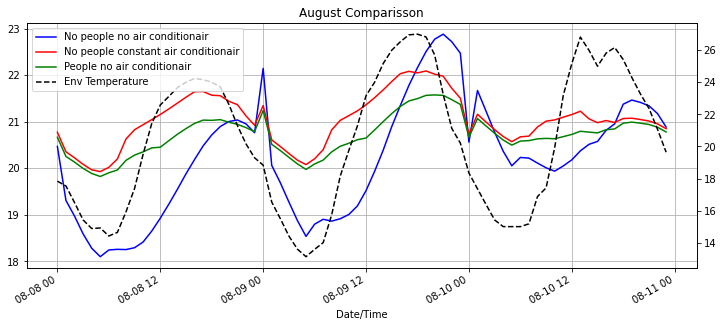

In [78]:
plt.figure(figsize=(12,5))
plt.xlabel('Number of requests every 10 minutes')

ax1 = data1_sd.plot(color='blue', grid=True, label='No people no air conditionair')
ax2 = data2_sd.plot(color='red', grid=True, secondary_y=True, label='No people constant air conditionair')
ax3 = data3_sd.plot(color='green', grid=True, secondary_y=True, label='People no air conditionair')
ax4 = data_env_sd.plot(linestyle = '--',color='black', grid=True, secondary_y=True, label='Env Temperature')


h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
plt.title('August Comparisson')
plt.legend(h1+h2, l1+l2, loc=0)

In [75]:
# NO PEOPLE NO AIR CONDITIONAIR TIENE QUE TENER ALGO XQ SUBE Y LUEGO HACE UN VALLE... NO TIENE SENTIDO

Esta gráfica que comprende los dçias 8-9-10 de agosto. se puede observar comparando la linea azul con la de puntos, la inrcia términca que realizan los muros al ser el único aislante térmico en ese caso. Por otro lado se observa un especie de pico a las 00:00 de la noche qen todas las gráficas... Tengo que repasar si hay algo que se encienda o si es un fallo.....

In [ ]:
Por lógica debería haber maypr diferencia durante la noche en el estidio con gente y sin aire acondicionado que sin gente y con aire acondicionado......... 

__TemperatureStudy4__:

- PEOPLE: SÍ
- LIGHTS: NO
- ELECTRICEQUIPMENT: NO
- AIRCONDITIONER: SÍ
  - DATOS:
              key 	HVACTemplate:Thermostat
              Name 	thermostat 1
              Heating_Setpoint_Schedule_Name 	Always On Continuous
              Constant_Heating_Setpoint 	15
              Cooling_Setpoint_Schedule_Name 	
              Constant_Cooling_Setpoint 	25
              -----------------------------
              fields: 	
              key 	HVACTemplate:Thermostat
              Name 	thermostat 1
              Heating_Setpoint_Schedule_Name 	Always On Continuous
              Constant_Heating_Setpoint 	15
              Cooling_Setpoint_Schedule_Name 	
              Constant_Cooling_Setpoint 	25
              -------------------------------
              key 	HVACTemplate:Zone:Unitary
              Zone_Name 	Thermal Zone 1
              Template_Unitary_System_Name 	system 1
              Template_Thermostat_Name 	thermostat 1
              Supply_Air_Maximum_Flow_Rate 	autosize

In [31]:
idffile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/simple_room_1_window_1_door_unitary_System_sch_constant.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf4 = initialization(idffile,iddfile,epwfile)

In [32]:
@interact
def show_not_null_classes(classes = notnullobj(idf4)):
    return epobject_to_df(idf4.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

In [33]:
data4 = eso_to_ts('studies/TemperatureStudy4/eplusout.csv')

__TemperatureStudy4__:

- PEOPLE: SÍ
- LIGHTS: NO
- ELECTRICEQUIPMENT: NO
- AIRCONDITIONER: SÍ
  - DATOS:
              key 	HVACTemplate:Thermostat
              Name 	thermostat 1
              Heating_Setpoint_Schedule_Name 	Always On Continuous
              Constant_Heating_Setpoint 	15
              Cooling_Setpoint_Schedule_Name 	
              Constant_Cooling_Setpoint 	25
              -----------------------------
              fields: 	
              key 	HVACTemplate:Thermostat
              Name 	thermostat 1
              Heating_Setpoint_Schedule_Name 	Always On Continuous
              Constant_Heating_Setpoint 	15
              Cooling_Setpoint_Schedule_Name 	
              Constant_Cooling_Setpoint 	25
              -------------------------------
              key 	HVACTemplate:Zone:Unitary
              Zone_Name 	Thermal Zone 1
              Template_Unitary_System_Name 	system 1
              Template_Thermostat_Name 	thermostat 1
              Supply_Air_Maximum_Flow_Rate 	autosize

In [34]:
idffile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/simple_room_1_window_1_door_unitary_System_sch_constant.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf5 = initialization(idffile,iddfile,epwfile)

In [35]:
@interact
def show_not_null_classes(classes = notnullobj(idf4)):
    return epobject_to_df(idf4.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

In [36]:
data5 = eso_to_ts('studies/TemperatureStudy5/eplusout.csv')